In [1]:
!pip install pvlib pandas pytz matplotlib

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 49.9 kB/s eta 0:00:00m eta 0:00:050:15:21
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 51.1 kB/s eta 0:00:000:00:060:00:11:23
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 47.5 kB/s eta 0:00:00m eta 0:00:030:14:20
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 43.5 kB/s eta 0:00:00m eta 0:00:020:00:24
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 42.7 kB/s eta 0:00:000:00:030:00:09:15
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [pvlib]━━━━━ 5/6 [pvlib][h5py]]


In [1]:
import pandas as pd
import pvlib
import pytz

In [2]:
# --- Location ---
latitude = 52.52       # example: Berlin
longitude = 13.405
timezone = "Etc/UTC"
# timezone = "Europe/Berlin"

# --- Time range ---
year = 2025

start = pd.Timestamp(f"{year}-01-01 00:00:00", tz=timezone)
end   = pd.Timestamp(f"{year}-12-31 23:59:00", tz=timezone)

# 1-minute resolution
times = pd.date_range(start=start, end=end, freq="10min")

In [3]:
# Create location object
location = pvlib.location.Location(latitude, longitude, tz=timezone)

# Calculate solar position
solar_position = location.get_solarposition(times)

solar_position.head()

,apparent_zenith,zenith,apparent_elevation,elevation,azimuth,equation_of_time
2025-01-01 00:00:00+00:00,148.960089,148.960089,-58.960089,-58.960089,22.813240,-3.438820
2025-01-01 00:10:00+00:00,148.318295,148.318295,-58.318295,-58.318295,27.058922,-3.442108
2025-01-01 00:20:00+00:00,147.577815,147.577815,-57.577815,-57.577815,31.163917,-3.445395
2025-01-01 00:30:00+00:00,146.745798,146.745798,-56.745798,-56.745798,35.119843,-3.448683
2025-01-01 00:40:00+00:00,145.829564,145.829564,-55.829564,-55.829564,38.922509,-3.451969


In [4]:
sun_data = solar_position[["azimuth", "elevation"]].copy()

sun_data.head()

,azimuth,elevation
2025-01-01 00:00:00+00:00,22.813240,-58.960089
2025-01-01 00:10:00+00:00,27.058922,-58.318295
2025-01-01 00:20:00+00:00,31.163917,-57.577815
2025-01-01 00:30:00+00:00,35.119843,-56.745798
2025-01-01 00:40:00+00:00,38.922509,-55.829564


*optional:*

Remove nighttime values (sun below horizon):

In [ ]:
sun_data = sun_data[sun_data["elevation"] > 0]

In [5]:
sun_data.to_csv("sun_position_10min.csv")

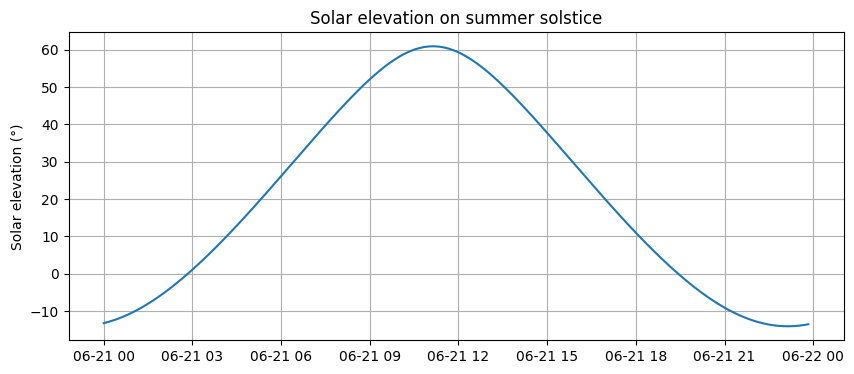

In [6]:
import matplotlib.pyplot as plt

# Plot one day
day = sun_data.loc["2025-06-21"]

plt.figure(figsize=(10,4))
plt.plot(day.index, day["elevation"])
plt.ylabel("Solar elevation (°)")
plt.title("Solar elevation on summer solstice")
plt.grid(True)
plt.show()